## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## 1. Reading input data

In [2]:
data = pd.read_csv("../datasets/fuel_consumption.csv")
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,NaN,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


## 2. First five rows in table

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## 3. Data info and details

In [4]:
data.info()
data.describe()
# data.describe(include=[object])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1065 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1064 non-null   object 
 7   FUELTYPE                  1065 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1065.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.344883,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.416841,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## 4. Removing non-numeric columns with no importance

In [5]:
data.drop(columns=['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION'], inplace=True)
# data.drop(columns=['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], inplace=True)

continual_input_parameters = [
    'ENGINESIZE',
    'CYLINDERS',
    'FUELCONSUMPTION_CITY',
    'FUELCONSUMPTION_HWY',
    'FUELCONSUMPTION_COMB',
    'FUELCONSUMPTION_COMB_MPG',
]

categorical_input_parameters = [
    'FUELTYPE'
]

output_parameter = 'CO2EMISSIONS'

data

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,3.0,6,X,13.4,9.8,11.8,24,271
1063,3.2,6,NaN,13.2,9.5,11.5,25,264
1064,3.0,6,X,13.4,9.8,11.8,24,271
1065,3.2,6,X,12.9,9.3,11.3,25,260


## 5. Filling null values

In [6]:
for column in data.columns:
    if data[column].isnull().any():
        data[column] = data[column].fillna(data[column].mode()[0])  # fill with most common value

## 6. Correlational matrix

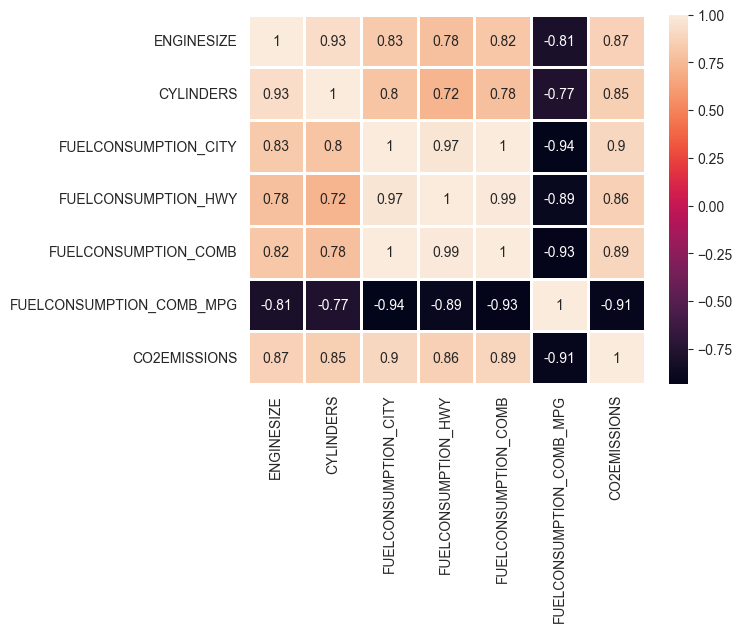

In [7]:
sb.heatmap(
    data=data.corr(numeric_only=True),
    annot=True,
    linewidths=2
)
plt.show()

## 7. Scatter chart

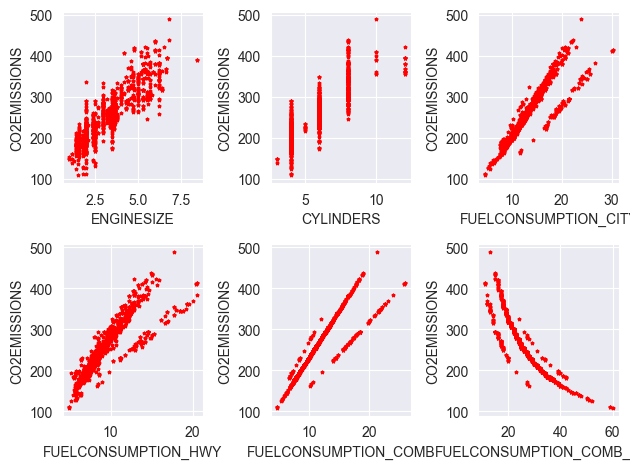

In [8]:
for i, column_name in enumerate(continual_input_parameters):
    plt.subplot(2, 3, i + 1)
    plt.scatter(data[column_name], data[output_parameter], c='red', marker='*', s=5)
    plt.xlabel(column_name)
    plt.ylabel(output_parameter)
plt.tight_layout()
plt.show()

## 8. Bar chart

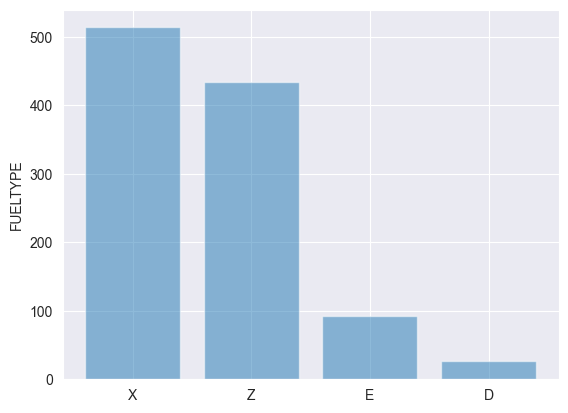

In [9]:
for i, column_name in enumerate(categorical_input_parameters):
    plt.figure(f"Bar chart of {column_name}")

    values_count = data[column_name].value_counts()
    y_pos = np.arange(len(values_count.values))

    plt.bar(y_pos, values_count.values, align='center', alpha=0.5)
    plt.xticks(y_pos, values_count.index)
    plt.ylabel(column_name)
    plt.show()

## 9. Performing One-Hot Encoding on categorical data

In [10]:
for column in categorical_input_parameters:
    ohe = OneHotEncoder(sparse_output=False)
    transformed = ohe.fit_transform(data[column].to_numpy().reshape(-1, 1))
    labels = ohe.get_feature_names_out([column])
    data.drop(columns=[column], inplace=True)
    data = data.join(pd.DataFrame(data=transformed, columns=labels))

data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,4,9.9,6.7,8.5,33,196,0.0,0.0,0.0,1.0
1,2.4,4,11.2,7.7,9.6,29,221,0.0,0.0,0.0,1.0
2,1.5,4,6.0,5.8,5.9,48,136,0.0,0.0,0.0,1.0
3,3.5,6,12.7,9.1,11.1,25,255,0.0,0.0,0.0,1.0
4,3.5,6,12.1,8.7,10.6,27,244,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271,0.0,0.0,1.0,0.0
1063,3.2,6,13.2,9.5,11.5,25,264,0.0,0.0,1.0,0.0
1064,3.0,6,13.4,9.8,11.8,24,271,0.0,0.0,1.0,0.0
1065,3.2,6,12.9,9.3,11.3,25,260,0.0,0.0,1.0,0.0


## 10. Scaling input data and removing not important features

In [11]:
data.drop(columns=['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY'], inplace=True)

sc = StandardScaler()
data = pd.DataFrame(
    data=sc.fit_transform(data),
    columns=data.columns
)

data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,-0.947967,-0.998969,-0.828558,0.878553,-0.950840,-0.161126,-0.307179,-0.964093,1.207694
1,-0.665489,-0.998969,-0.511433,0.342734,-0.556161,-0.161126,-0.307179,-0.964093,1.207694
2,-1.301063,-0.998969,-1.779932,2.887876,-1.898070,-0.161126,-0.307179,-0.964093,1.207694
3,0.111323,0.114242,-0.145519,-0.193086,-0.019397,-0.161126,-0.307179,-0.964093,1.207694
4,0.111323,0.114242,-0.291885,0.074824,-0.193056,-0.161126,-0.307179,-0.964093,1.207694
...,...,...,...,...,...,...,...,...,...
1062,-0.241774,0.114242,0.025240,-0.327041,0.233197,-0.161126,-0.307179,1.037244,-0.828024
1063,-0.100535,0.114242,-0.023548,-0.193086,0.122687,-0.161126,-0.307179,1.037244,-0.828024
1064,-0.241774,0.114242,0.025240,-0.327041,0.233197,-0.161126,-0.307179,1.037244,-0.828024
1065,-0.100535,0.114242,-0.096731,-0.193086,0.059538,-0.161126,-0.307179,1.037244,-0.828024


## 11. Train and test split

In [13]:
input_columns = list(set(data.columns).difference({output_parameter}))

x_train, x_test, y_train, y_test = train_test_split(
    data[input_columns],
    data[output_parameter],
    train_size=0.7,
    random_state=1
)

## 12. Creating model and performing linear regression

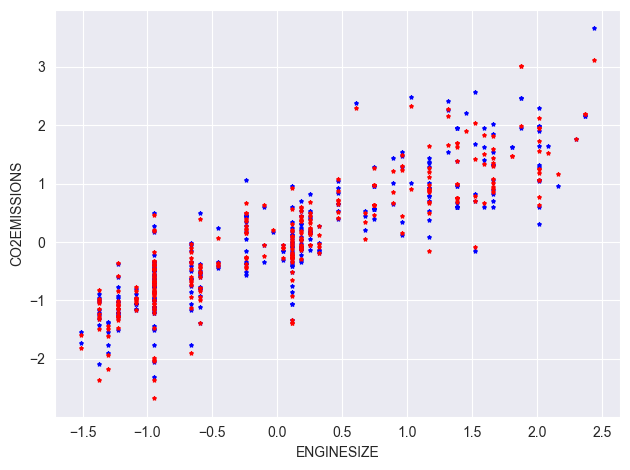

Score [train]: 0.9858114534505775
Score [test]: 0.9826427680607904
MSE [test]: 0.018387229332323868
MAE [test]: 0.09447823600216165


In [14]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

plt.figure("Result")
plt.scatter(x_test['ENGINESIZE'], y_test, c='blue', marker='*', s=7)
plt.scatter(x_test['ENGINESIZE'], lr_model.predict(x_test), c='red', marker='*', s=7)
plt.xlabel('ENGINESIZE')
plt.ylabel(output_parameter)
plt.tight_layout()
plt.show()

print(f'Score [train]: {lr_model.score(x_train, y_train)}')
print(f'Score [test]: {lr_model.score(x_test, y_test)}')
print(f'MSE [test]: {mean_squared_error(y_test, lr_model.predict(x_test))}')
print(f'MAE [test]: {mean_absolute_error(y_test, lr_model.predict(x_test))}')